In [27]:
# Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

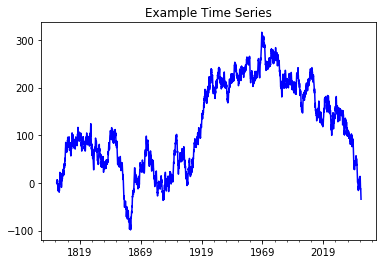

1800-01-31    0.722158
1800-02-28    2.955118
1800-03-31   -2.093415
1800-04-30    3.056400
1800-05-31    6.329118
1800-06-30    3.359891
1800-07-31    5.821630
1800-08-31    1.479063
1800-09-30    5.130279
1800-10-31   -0.600861
Freq: M, dtype: float64

In [51]:
# Generate data
random.seed(111)
rng = pd.date_range(start='1800', periods=3001, freq='M')
ts = pd.Series(np.random.uniform(-10, 10, size=len(rng)), rng).cumsum()
ts.plot(c='b', title='Example Time Series')
plt.show()
ts.head(10)

In [59]:
# Convert data into array
TS = np.array(ts)
num_periods = 50
f_horizon = 1  # forecast horizon, one period into the future (output???)

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1, num_periods, f_horizon)

y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, f_horizon)
print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(y_batches.shape)

60
(60, 50, 1)
[[[ 7.22157674e-01]
  [ 2.95511846e+00]
  [-2.09341532e+00]
  [ 3.05639957e+00]
  [ 6.32911834e+00]
  [ 3.35989052e+00]
  [ 5.82163033e+00]
  [ 1.47906281e+00]
  [ 5.13027941e+00]
  [-6.00860871e-01]
  [-9.95809171e+00]
  [-7.47040208e+00]
  [-1.30803913e+01]
  [-1.67671337e+01]
  [-1.14829268e+01]
  [-9.33806858e+00]
  [-1.39968414e+01]
  [-5.58029226e+00]
  [-1.20930616e+01]
  [-4.15339533e+00]
  [-8.10786354e+00]
  [-1.37016194e+01]
  [-4.59940608e+00]
  [-2.09305127e+00]
  [-1.07937515e+01]
  [-1.95691556e+01]
  [-1.63937544e+01]
  [-1.68996609e+01]
  [-1.37788500e+01]
  [-3.82219367e+00]
  [ 6.16798647e+00]
  [ 1.57938464e+01]
  [ 2.20521416e+01]
  [ 2.11370058e+01]
  [ 1.76350954e+01]
  [ 2.06903833e+01]
  [ 1.40812025e+01]
  [ 1.42501036e+01]
  [ 5.23381201e+00]
  [ 6.21185749e+00]
  [-1.48360026e+00]
  [-1.35318564e-02]
  [-2.87795363e+00]
  [ 6.52486580e+00]
  [ 8.34684084e+00]
  [ 9.60260659e-01]
  [-6.50199011e+00]
  [-9.47400400e+00]
  [-7.90598018e+00]
  [-4

In [60]:
def test_data(series, forecast, num_periods):
    test_x_setup = series[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = series[-(num_periods):].reshape(-1, num_periods, 1)
    return testX, testY


X_test, Y_test = test_data(TS, f_horizon, num_periods)
print(X_test.shape)
print(X_test)

(1, 50, 1)
[[[ 48.27857983]
  [ 56.92065127]
  [ 49.41354444]
  [ 40.52563196]
  [ 39.98975857]
  [ 43.16009609]
  [ 50.71854901]
  [ 41.83751784]
  [ 37.61857682]
  [ 38.8608381 ]
  [ 37.76767478]
  [ 29.0100616 ]
  [ 28.40770814]
  [ 20.31196011]
  [ 12.80584155]
  [  3.18748499]
  [  0.80480057]
  [  0.89643077]
  [  7.70355003]
  [  1.94023589]
  [ -5.92658255]
  [ -5.9725987 ]
  [-13.53952373]
  [ -9.08700022]
  [-16.04278614]
  [ -6.74788175]
  [-13.88063551]
  [ -9.57447524]
  [ -1.17791433]
  [  1.21523493]
  [  4.93697903]
  [  4.71916931]
  [  3.2222296 ]
  [ -6.67594145]
  [  2.95878257]
  [  6.09480822]
  [ 11.43250126]
  [  6.13617192]
  [ 11.80972206]
  [  7.04331154]
  [ 13.66830065]
  [  9.99102509]
  [ 11.39806255]
  [  1.43674614]
  [ -3.0002645 ]
  [-12.79110289]
  [-12.20102624]
  [-12.41366804]
  [-20.44729496]
  [-28.74843243]]]


In [63]:
tf.reset_default_graph()

num_periods = 50
inputs = 1
hidden = 100
output = 1

x = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, x, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [64]:
epochs = 10000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={x: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={x: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)
    
    y_pred = sess.run(outputs, feed_dict={x: X_test})
    print(y_pred)

0 	MSE: 86909200.0


100 	MSE: 1351028.9


200 	MSE: 773802.75


300 	MSE: 347184.75


400 	MSE: 145639.58


500 	MSE: 103393.61


600 	MSE: 97598.58


700 	MSE: 94384.19


800 	MSE: 92934.86


900 	MSE: 90867.914


1000 	MSE: 88943.66


1100 	MSE: 87484.805


1200 	MSE: 89522.86


1300 	MSE: 85184.07


1400 	MSE: 83685.805


1500 	MSE: 82707.56


1600 	MSE: 81513.234


1700 	MSE: 79985.98


1800 	MSE: 78743.85


1900 	MSE: 78273.35


2000 	MSE: 77535.92


2100 	MSE: 75777.28


2200 	MSE: 74863.47


2300 	MSE: 74903.25


2400 	MSE: 74049.914


2500 	MSE: 72433.266


2600 	MSE: 72009.055


2700 	MSE: 74518.92


2800 	MSE: 71446.18


2900 	MSE: 69527.36


3000 	MSE: 69511.47


3100 	MSE: 68388.18


3200 	MSE: 67272.05


3300 	MSE: 66998.7


3400 	MSE: 66840.12


3500 	MSE: 66141.07


3600 	MSE: 65642.336


3700 	MSE: 65493.773


3800 	MSE: 64197.293


3900 	MSE: 64525.89


4000 	MSE: 64532.65


4100 	MSE: 71612.98


4200 	MSE: 62849.766


4300 	MSE: 66139.06


4400 	MSE: 65263.08


4500 	MSE: 65083.07


4600 	MSE: 64486.535


4700 	MSE: 62204.39


4800 	MSE: 60583.32


4900 	MSE: 62831.383


5000 	MSE: 62103.562


5100 	MSE: 60182.445


5200 	MSE: 61078.035


5300 	MSE: 68619.0


5400 	MSE: 59433.0


5500 	MSE: 71249.65


5600 	MSE: 64506.4


5700 	MSE: 59159.387


5800 	MSE: 57990.58


5900 	MSE: 57745.633


6000 	MSE: 61874.12


6100 	MSE: 58853.523


6200 	MSE: 57589.24


6300 	MSE: 56545.58


6400 	MSE: 55334.824


6500 	MSE: 57856.457


6600 	MSE: 56499.7


6700 	MSE: 62024.887


6800 	MSE: 55415.848


6900 	MSE: 59669.766


7000 	MSE: 56432.0


7100 	MSE: 56284.62


7200 	MSE: 55061.812


7300 	MSE: 55373.57


7400 	MSE: 53663.61


7500 	MSE: 55475.594


7600 	MSE: 52895.29


7700 	MSE: 53283.074


7800 	MSE: 56016.617


7900 	MSE: 51197.246


8000 	MSE: 55080.71


8100 	MSE: 53071.496


8200 	MSE: 51928.066


8300 	MSE: 58745.023


8400 	MSE: 50336.812


8500 	MSE: 51799.71


8600 	MSE: 63593.895


8700 	MSE: 52047.355


8800 	MSE: 52028.562


8900 	MSE: 51008.938


9000 	MSE: 49821.46


9100 	MSE: 50432.8


9200 	MSE: 53400.523


9300 	MSE: 50702.223


9400 	MSE: 53162.312


9500 	MSE: 51233.246


9600 	MSE: 46976.45


9700 	MSE: 47183.4


9800 	MSE: 49076.85


9900 	MSE: 48852.53


[[[ 49.223423 ]
  [ 56.724895 ]
  [ 51.346058 ]
  [ 43.39223  ]
  [ 40.883434 ]
  [ 45.957085 ]
  [ 41.90487  ]
  [ 38.489925 ]
  [ 39.933693 ]
  [ 36.098736 ]
  [ 31.230974 ]
  [ 27.343304 ]
  [ 23.068493 ]
  [ 15.502531 ]
  [  4.3889093]
  [  4.2539215]
  [  4.2259064]
  [  8.10966  ]
  [  4.116267 ]
  [ -5.9704437]
  [ -7.6050477]
  [-13.664618 ]
  [ -9.9396515]
  [-15.319541 ]
  [ -7.7398634]
  [-13.97419  ]
  [-10.15637  ]
  [ -0.6401444]
  [  3.1635768]
  [  2.9632697]
  [  5.6238146]
  [  2.9105372]
  [ -7.003888 ]
  [  2.090541 ]
  [  6.2329745]
  [ 10.235571 ]
  [  7.0491176]
  [ 11.097153 ]
  [  7.5433965]
  [ 14.848516 ]
  [ 11.239498 ]
  [ 11.311307 ]
  [  3.1839967]
  [ -2.432776 ]
  [-12.073398 ]
  [-12.532767 ]
  [-13.341652 ]
  [-19.838552 ]
  [-29.641539 ]
  [-35.46076  ]]]


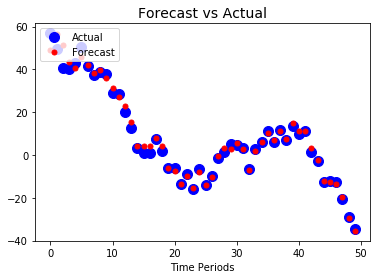

In [65]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")

plt.show()